In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
import matplotlib.image as mpimg
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 为了显示中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

d:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 导入数据

In [3]:
X=pd.read_excel('D:\\my_dateset\\data_pre_3.xlsx',index_col='SMILES')
y=pd.read_excel('D:\\my_dateset\\ADMET.xls',index_col='SMILES')
y1,y2,y3,y4,y5=y['Caco-2'],y['CYP3A4'],y['hERG'],y['HOB'],y['MN']

In [4]:
X

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,26,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,28,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,27,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,28,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,28,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,34,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,32,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228


# Caco-2

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=8.178086184933107, gamma=0.03001238563649149; total time=   0.4s
[CV] END .....C=8.178086184933107, gamma=0.03001238563649149; total time=   0.4s
[CV] END .....C=8.178086184933107, gamma=0.03001238563649149; total time=   0.5s
[CV] END ....C=3.883790827312268, gamma=0.034679854336442904; total time=   0.4s
[CV] END ....C=3.883790827312268, gamma=0.034679854336442904; total time=   0.4s
[CV] END ....C=3.883790827312268, gamma=0.034679854336442904; total time=   0.4s
[CV] END ...C=9.334702746957975, gamma=0.0027187606806301752; total time=   0.5s
[CV] END ...C=9.334702746957975, gamma=0.0027187606806301752; total time=   0.5s
[CV] END ...C=9.334702746957975, gamma=0.0027187606806301752; total time=   0.5s
[CV] END .....C=7.274860380233762, gamma=0.03525839001444636; total time=   0.4s
[CV] END .....C=7.274860380233762, gamma=0.03525839001444636; total time=   0.5s
[CV] END .....C=7.274860380233762, gamma=0.03525

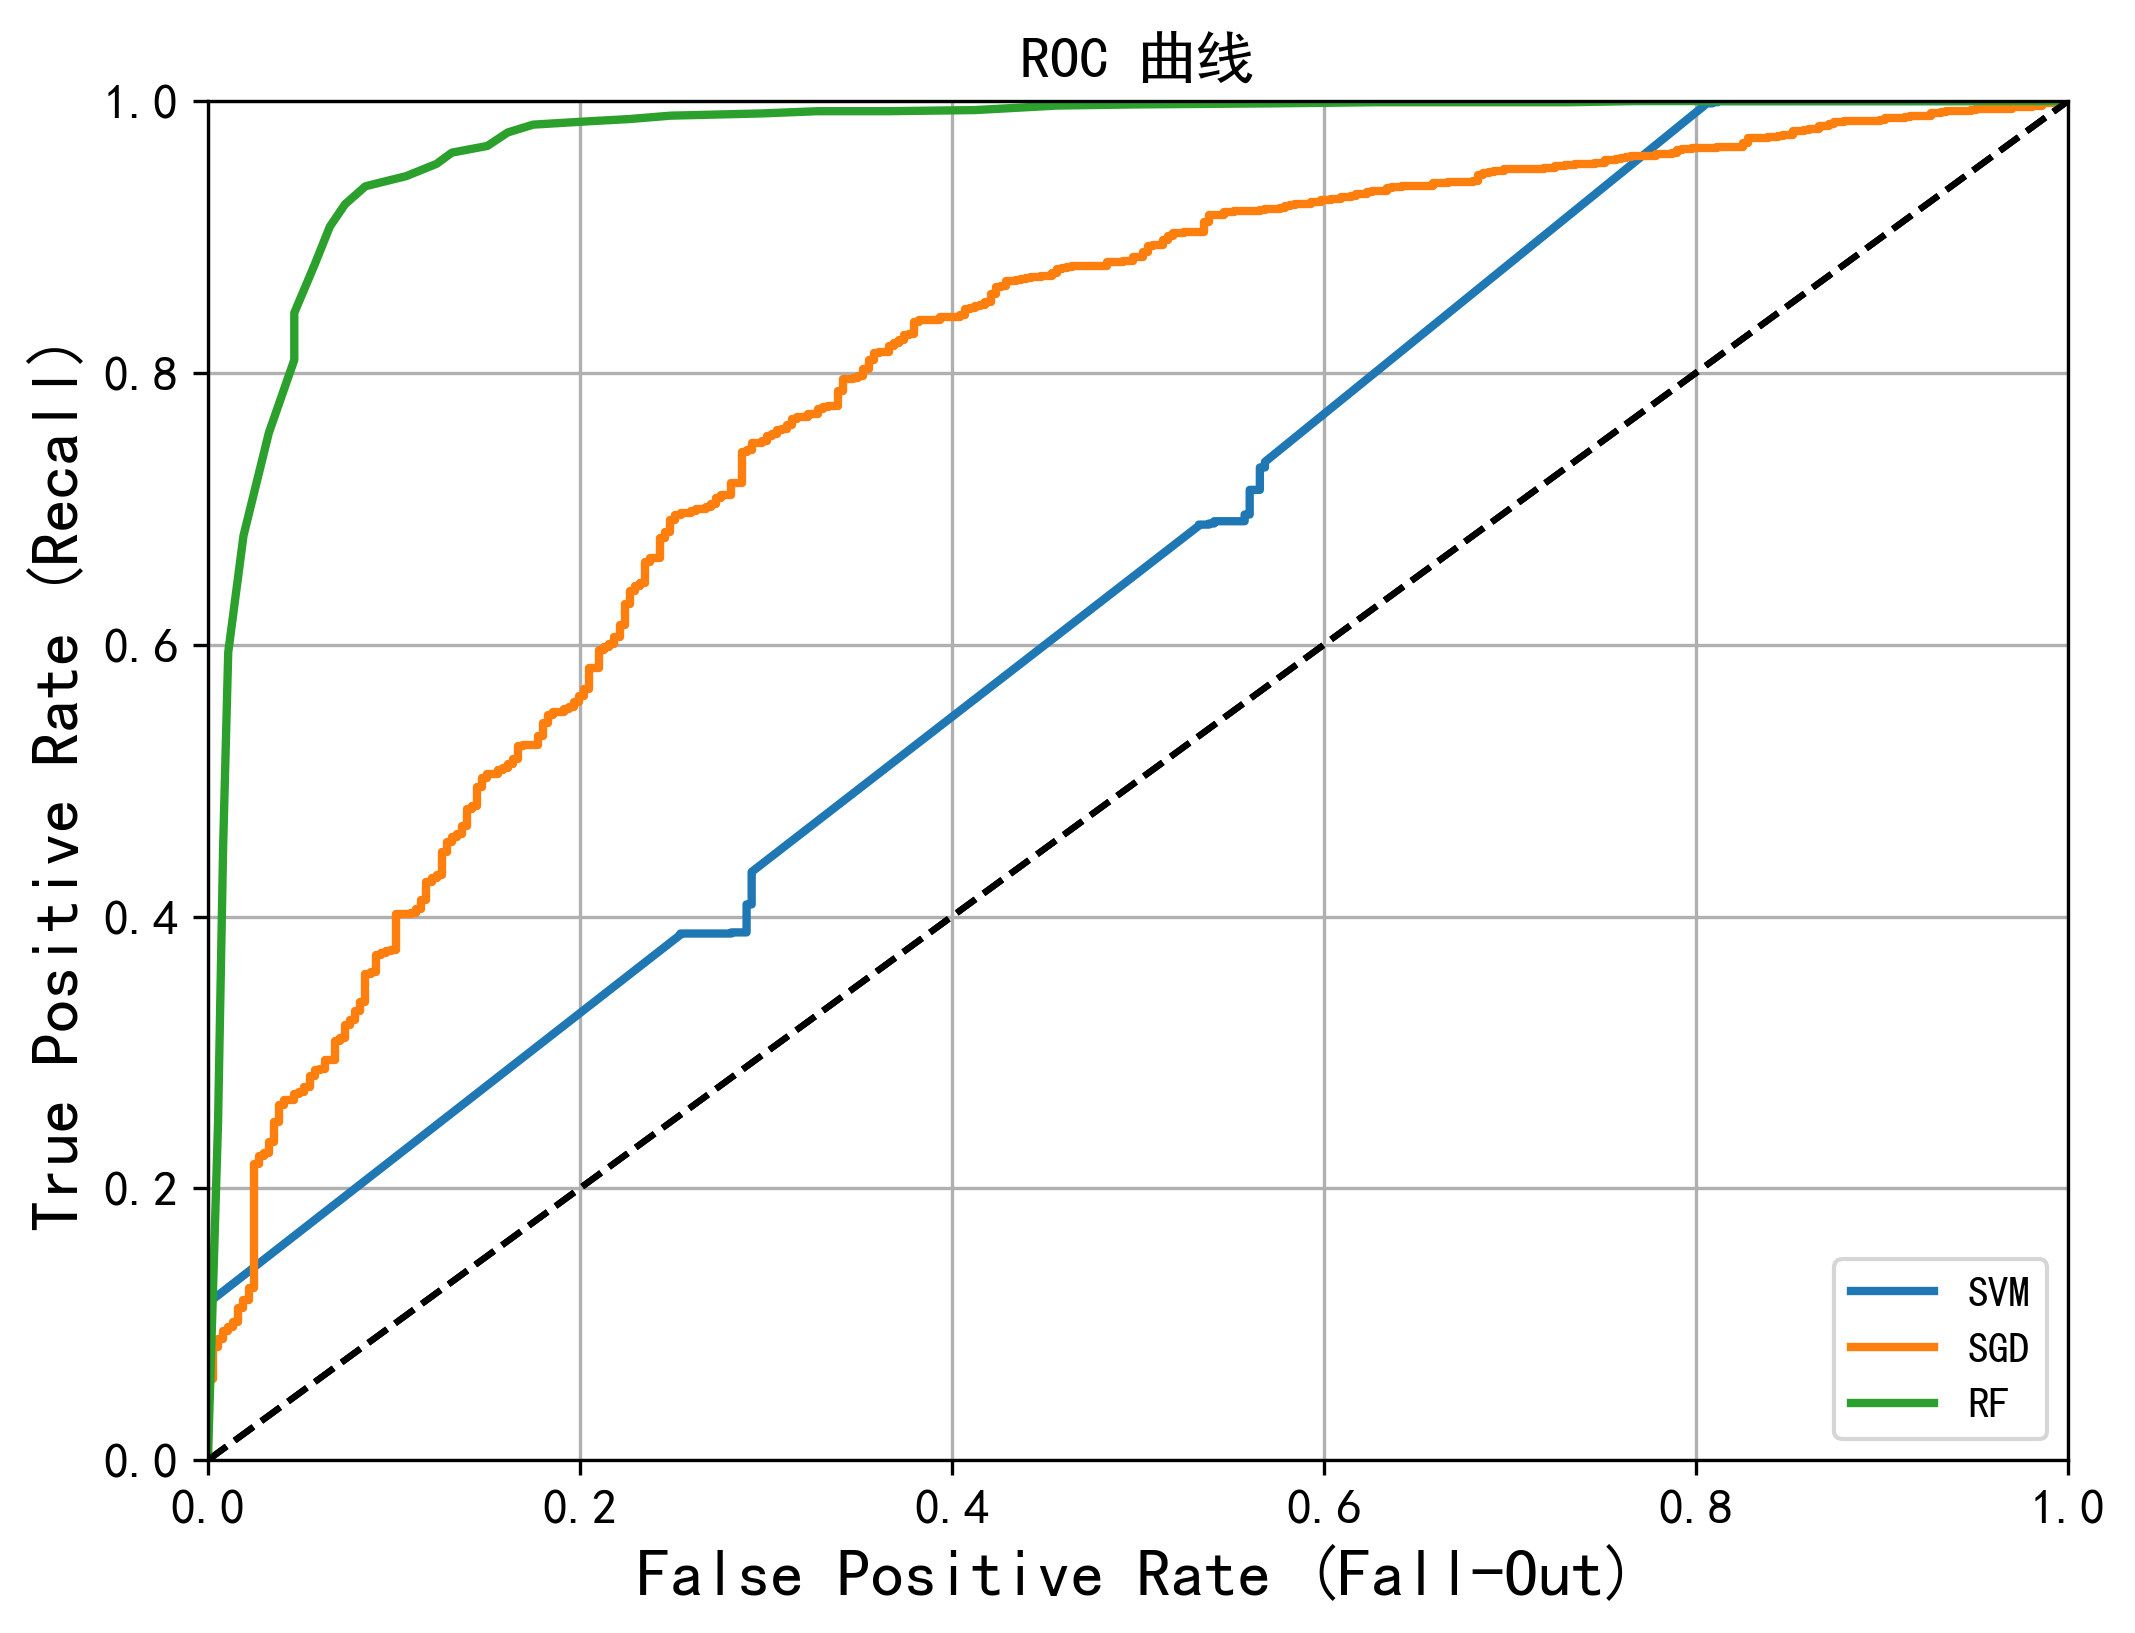

SGD 的 AUC 值： 0.7846620626275458
SVM 的 AUC 值： 0.6380704931547578
RF 的 AUC 值：  0.9717394438212623
SGD 交叉验证训练集准确率：  0.8005039103442714
SGD 交叉验证测试集准确率：-> 0.7000641025641026
SVM 交叉验证训练集准确率：  0.8087478835765541
SVM 交叉验证测试集准确率：-> 0.7746794871794871
RF 交叉验证训练集准确率：  0.9455373699911311
RF 交叉验证测试集准确率： ->  0.9116666666666667
准确率： 0.9392405063291139


In [9]:
#分割数据
X5_train, X5_val, y5_train, y5_val = train_test_split(X, y5, test_size=0.2,random_state=49)
#定义ROC曲线
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
    plt.grid(True)
## SGD

#建立模型
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42,n_jobs=200)
sgd_clf.fit(X5_train, y5_train)
y5_scores_sgd=cross_val_predict(sgd_clf,X5_train,y5_train, cv=3,method="decision_function")
fpr_sgd,tpr_sgd,thresholds_sgd=roc_curve(y5_train,y5_scores_sgd)
from sklearn.model_selection import cross_val_score
accuracy_SGD_train=sum(cross_val_score(sgd_clf,X5_train,y5_train,cv=10,scoring="accuracy"))/10
accuracy_SGD_val=sum(cross_val_score(sgd_clf,X5_val,y5_val,cv=10,scoring="accuracy"))/10
## SVM
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from scipy.stats import reciprocal, uniform
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2,cv=3,n_jobs=1)
rnd_search_cv.fit(X5_train, y5_train)
# 搜寻到的最佳模型
print('搜寻到的最佳模型:',rnd_search_cv.best_estimator_)
# 最佳参数
print('最佳分数:',rnd_search_cv.best_score_)
#交叉验证
from sklearn.model_selection import cross_val_score
accuracy_SVM_train=sum(cross_val_score(rnd_search_cv.best_estimator_, X5_train, y5_train,cv=10, scoring="accuracy"))/10
accuracy_SVM_val=sum(cross_val_score(rnd_search_cv.best_estimator_, X5_val, y5_val,cv=10, scoring="accuracy"))/10
y5_scores_svm = cross_val_predict(rnd_search_cv.best_estimator_, X5_train, y5_train,cv=3,method="decision_function")
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y5_train, y5_scores_svm)

'''
搜寻到的最佳模型: SVC(C=6.499169710417626, gamma=0.0018146529697960691)
最佳分数: 0.6352094621731926
'''
## RF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
param_distributions = {
'n_estimators': randint(low=1, high=200),
'max_features': randint(low=1, high=8),
}
forest_clf = RandomForestClassifier(random_state=42)
rnd_search_cv_forest = RandomizedSearchCV(forest_clf, param_distributions, n_iter=10,verbose=2, cv=3,n_jobs=1)
rnd_search_cv_forest.fit(X5_train,y5_train)
## 保存模型
import joblib
#保存模型
forest_clf_y5=rnd_search_cv_forest.best_estimator_
joblib.dump(forest_clf_y5,'forest_clf_y5.pkl') #将 clf 存入.pkl 的文件中
# 搜寻到的最佳模型
print('搜寻到的最佳模型:',rnd_search_cv_forest.best_estimator_)
# 最佳参数
print('最佳分数:',rnd_search_cv_forest.best_score_)
#交叉验证计算准确率
from sklearn.model_selection import cross_val_score
accuracy_RF_train=sum(cross_val_score(rnd_search_cv_forest.best_estimator_,X5_train,y5_train, cv=10, scoring="accuracy"))/10
accuracy_RF_val=sum(cross_val_score(rnd_search_cv_forest.best_estimator_, X5_val, y5_val,cv=10, scoring="accuracy"))/10
y_probas_forest = cross_val_predict(rnd_search_cv_forest.best_estimator_, X5_train, y5_train,cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y5_train,y_scores_forest)

'''
搜寻到的最佳模型: RandomForestClassifier(max_features=3, n_estimators=121, random_state=42)
最佳分数: 0.8992960608749816
'''
# ROC 曲线、AUC 值和准确率

plt.figure(figsize=(8, 6),dpi=300) # Not shown
plot_roc_curve(fpr_svm, tpr_svm,'SVM')
plot_roc_curve(fpr_sgd, tpr_sgd,'SGD')
plot_roc_curve(fpr_forest, tpr_forest,'RF')
plt.legend(loc='lower right')
plt.title("ROC 曲线", fontsize=14)
plt.show()
print('SGD 的 AUC 值：',roc_auc_score(y5_train, y5_scores_sgd))
print('SVM 的 AUC 值：',roc_auc_score(y5_train, y5_scores_svm))
print('RF 的 AUC 值： ',roc_auc_score(y5_train, y_scores_forest))
print('SGD 交叉验证训练集准确率： ',accuracy_SGD_train)
print('SGD 交叉验证测试集准确率：->',accuracy_SGD_val)
print('SVM 交叉验证训练集准确率： ',accuracy_SVM_train)
print('SVM 交叉验证测试集准确率：->',accuracy_SVM_val)
print('RF 交叉验证训练集准确率： ',accuracy_RF_train)
print('RF 交叉验证测试集准确率： -> ',accuracy_RF_val)

# 用 RF 预测

#生成361个特征
feature_3=[]
for i in range(0,361):
    feature_3.append(X.columns[i])
feature_3
X_test= pd.read_excel('D:\\my_dateset\\Molecular_Descriptor.xlsx',index_col='SMILES' ,sheet_name='test')
X_test=X_test[feature_3]
X_test.head()
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
X5_train, X5_val, y5_train, y5_val = train_test_split(X, y5,test_size=.2,random_state=49)#############需要改

forest_clf = rnd_search_cv_forest.best_estimator_
forest_clf.fit(X5_train, y5_train)
## 模型准确率检验
y5_val_pred=forest_clf.predict(X5_val)
print('准确率：',accuracy_score(y5_val, y5_val_pred))
## 预测 test 数据
y_test_pred=forest_clf.predict(X_test)
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred.to_excel('D:\\my_dateset\\ADMET_MN_pre.xlsx', index=False)#############需要改